# COMP809 - Lab 3

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [10]:
# Read Housing Dataset
# Refer to https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# for more details about linear regression. Loading housing dataset in to a dataframe. This dataset 
# has 14 features with 506samples. MEDV is the target variable.

# Reading file from internet
#df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
#                 'python-machine-learning-book-2nd-edition'
#                 '/master/code/ch10/housing.data.txt', header=None, sep='\s+');

#df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
#              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#df.to_excel('lab3_data.xlsx'); # To export data

# Reading data from a file in the directory
df = pd.read_excel('lab3_data.xlsx')

print(df.head())
print("Dimensions of the data set:", df.shape)

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   TAX  PTRATIO       B  LSTAT  MEDV  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  
Dimensions of the data set: (506, 15)


## Question 1 

In [9]:
# Let's use the RM (number of rooms) variable from the Housing dataset as the
# explanatory variable and train a model that can predict MEDV (house prices).
# We only use one feature here, just to explain the concepts and applicability of the model.

X = df[['RM']].values
y = df['MEDV'].values

### Question 1 (a)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           2.49e-74
Time:                        22:56:03   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

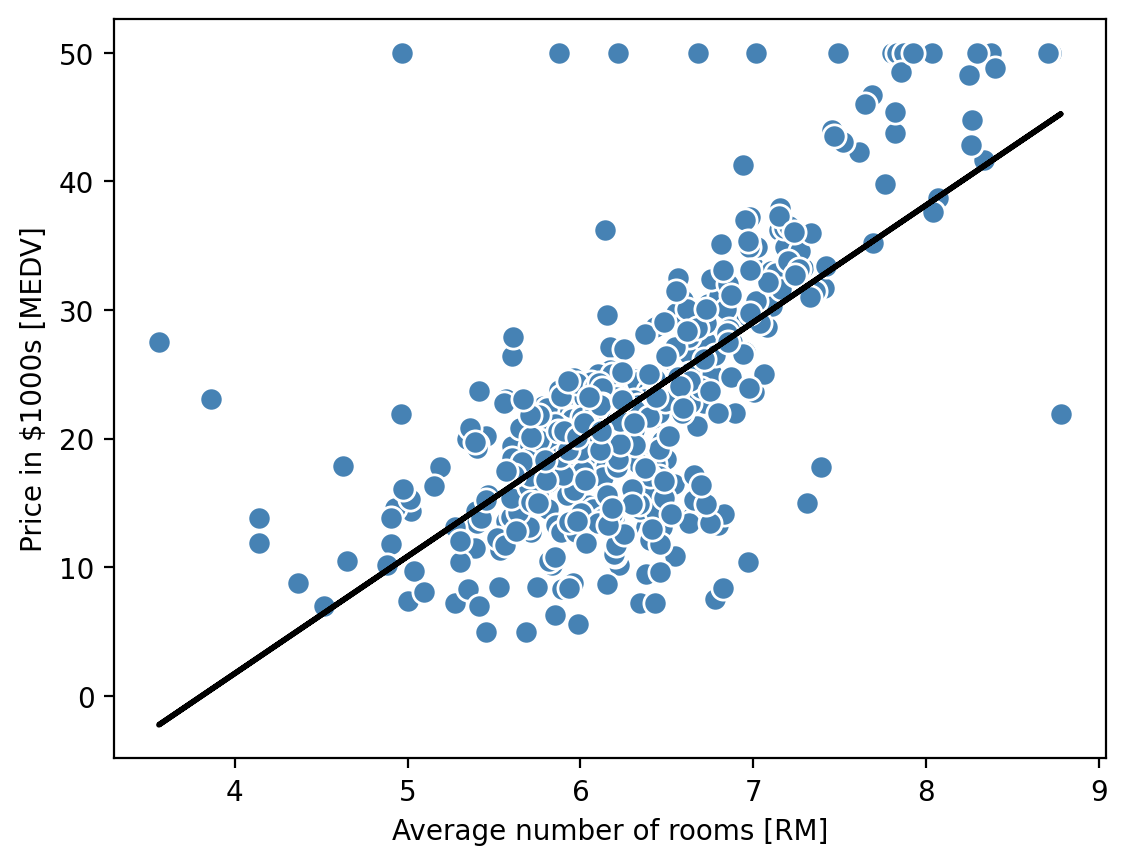

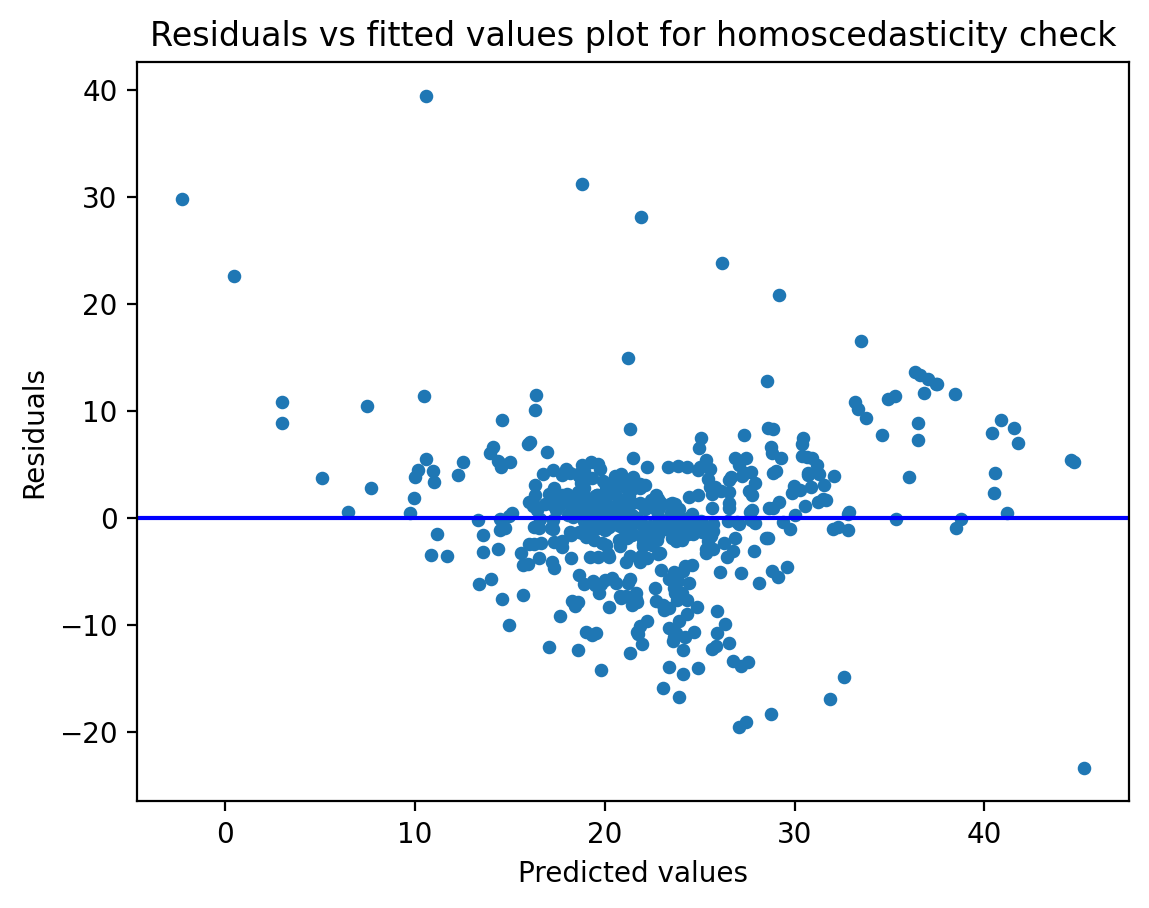

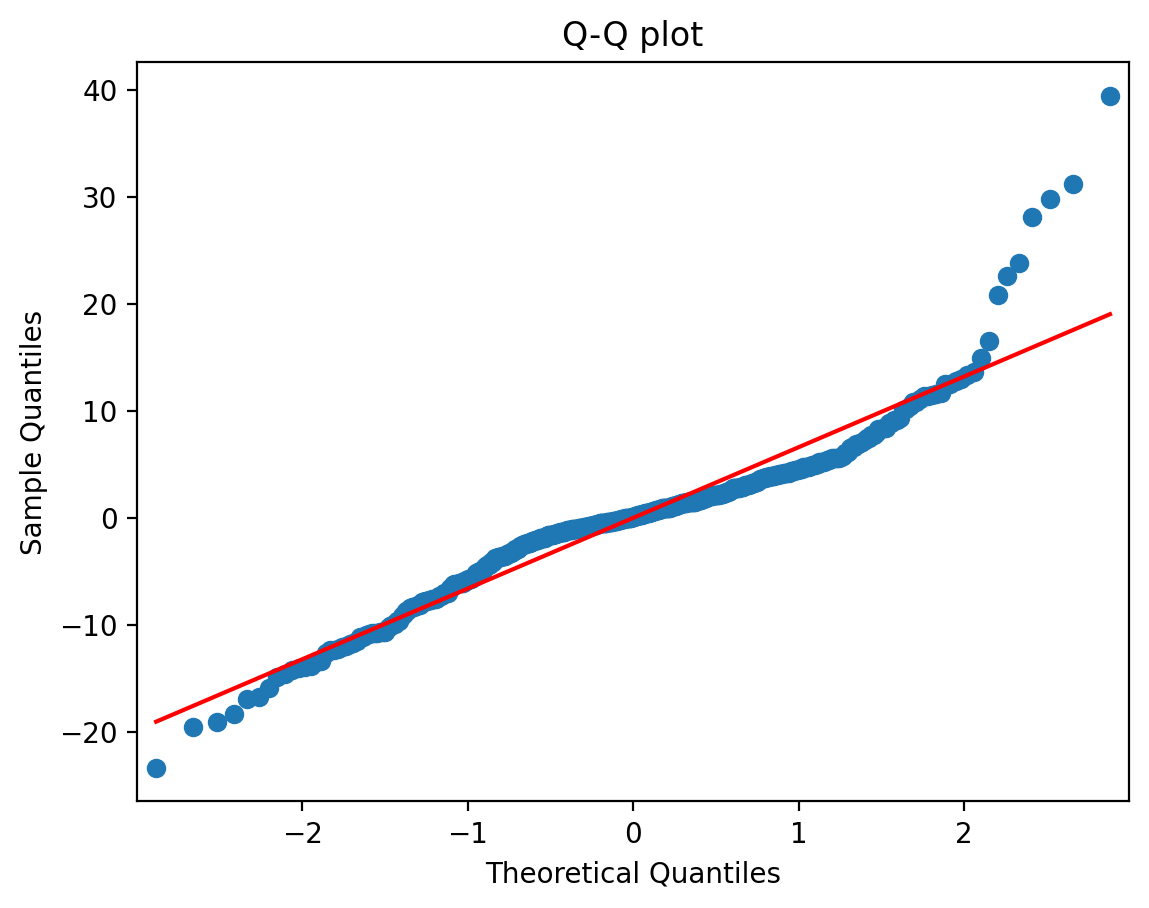

Slope: 9.102


In [12]:
# Applying Sklearn linear regression model
slr = LinearRegression()
slr.fit(X, y)

# Another way of implementing the model (discussed in class)
import statsmodels.formula.api as smf
mod     = smf.ols("MEDV ~ RM", data = df)
mod_res = mod.fit()
print(mod_res.summary())

# A function that will plot a scatterplot of the training samples and add the regression line
def lin_reg_plot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    plt.xlabel('Average number of rooms [RM]')
    plt.ylabel('Price in $1000s [MEDV]')
    plt.show()

# Plotting MEDV against RM by calling the lin_regplot function
lin_reg_plot(X, y, slr)

# Predicted values vs Residuals NEW ONE
ypred = slr.predict(X)
residuals = y - ypred # from list to an array
p = plt.scatter(ypred, residuals, s = 15)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y = 0.0, color = 'b', linestyle = '-')
p = plt.title("Residuals vs fitted values plot for homoscedasticity check")
plt.show()

# Homoscedasticity assumption could be invalidated.  It seems there is a negative linear relationship,
# but this can be an illusion caused by a few points.
# However, the sample size is large enough to be concerned about this assumption.

# QQ plot
sm.qqplot(residuals, line='s');
plt.title('Q-Q plot')
plt.show()
# The residuals are clearly not normal.  However, when the sample size is sufficiently large (>200), 
# the normality assumption is not needed at all as the Central Limit Theorem ensures that the 
# distribution of residuals will approximate normality.



### Question 1 (b)

In [13]:
print('Slope: %.3f' % slr.coef_[0])

# For one unit increase in the average number of rooms per dwelling, MEDV is expected to increase in 9.1.

Slope: 9.102


## Question 2

In [14]:
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

mod     = smf.ols("MEDV ~ CRIM + ZN + INDUS + C(CHAS) + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = df)
mod_res = mod.fit()
print(mod_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          6.72e-135
Time:                        22:59:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4595      5.103      7.144   

### Question 2 (a)

In [ ]:
# CHAS is nominal categorical and RAD is ordinal categorical
# So we will treat RAD as a numerical variable to keep the order information.

### Question 2 (b)

    VIF Factor       Feature
0       585.27     Intercept
1         1.07  C(CHAS)[T.1]
2         1.79          CRIM
3         2.30            ZN
4         3.99         INDUS
5         4.39           NOX
6         1.93            RM
7         3.10           AGE
8         3.96           DIS
9         7.48           RAD
10        9.01           TAX
11        1.80       PTRATIO
12        1.35             B
13        2.94         LSTAT


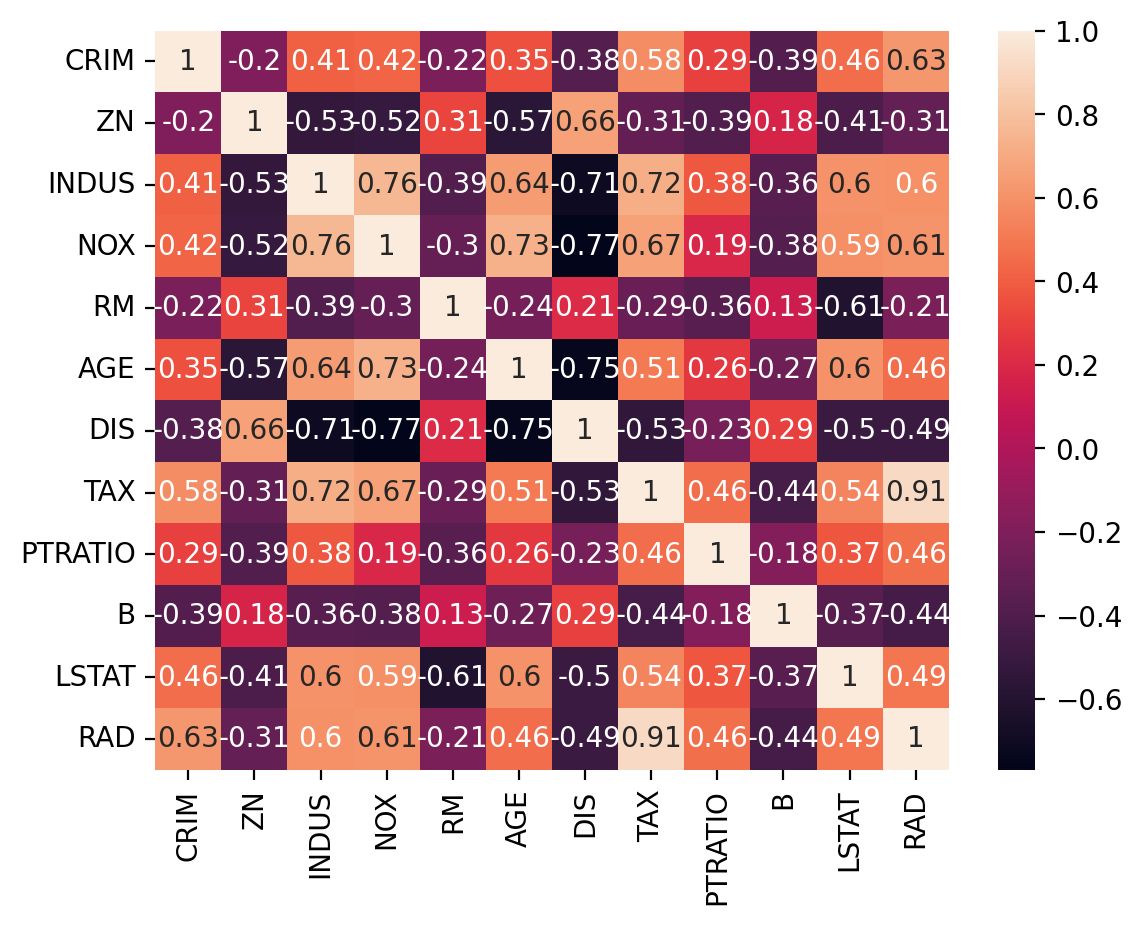

In [15]:
y, X = dmatrices("MEDV ~ CRIM + ZN + INDUS + C(CHAS) + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", df, return_type="dataframe");

# For each X, we calculate VIF values and save them in a dataframe
vif = pd.DataFrame();

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])];
vif["Feature"] = X.columns;
print(vif.round(2));

Xc = df[["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT", "RAD"]];
correlation_mat = Xc.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

# There are several variables that are highly correlated.  According to the VIF value TAX and RAD can be 
# explained by the other predictors.

# Potential solutions:
# - Eliminate some of the highly correlated variables.
# - Drop the variables with the highest VIF values.  This should decrease the other VIF values.
# - Calculate principal components and then fit a linear regression model.

# Multicollinearity causes the following two basic types of problems:

# 1. The coefficient estimates can swing wildly based on which other independent variables are in the model. 
#    The coefficients become very sensitive to small changes in the model.
# 2. Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical 
#    power of your regression model. You might not be able to trust the p-values to identify independent 
#    variables that are statistically significant.

# see https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/


### Question 2 (c)

[0.5105599  0.11187327 0.0983154  0.06958883 0.05538928 0.04478392
 0.03303479 0.02308896 0.01835545 0.01551346 0.0141096  0.00538714]
Var explained by PCs:  [0.5105599  0.62243317 0.72074858 0.79033741 0.84572669 0.8905106
 0.92354539 0.94663435 0.96498981 0.98050326 0.99461286 1.        ]
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     151.2
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          6.89e-128
Time:                        23:01:39   Log-Likelihood:                -1528.1
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     497   BIC:                             3112.
Df Model:                           8                                       

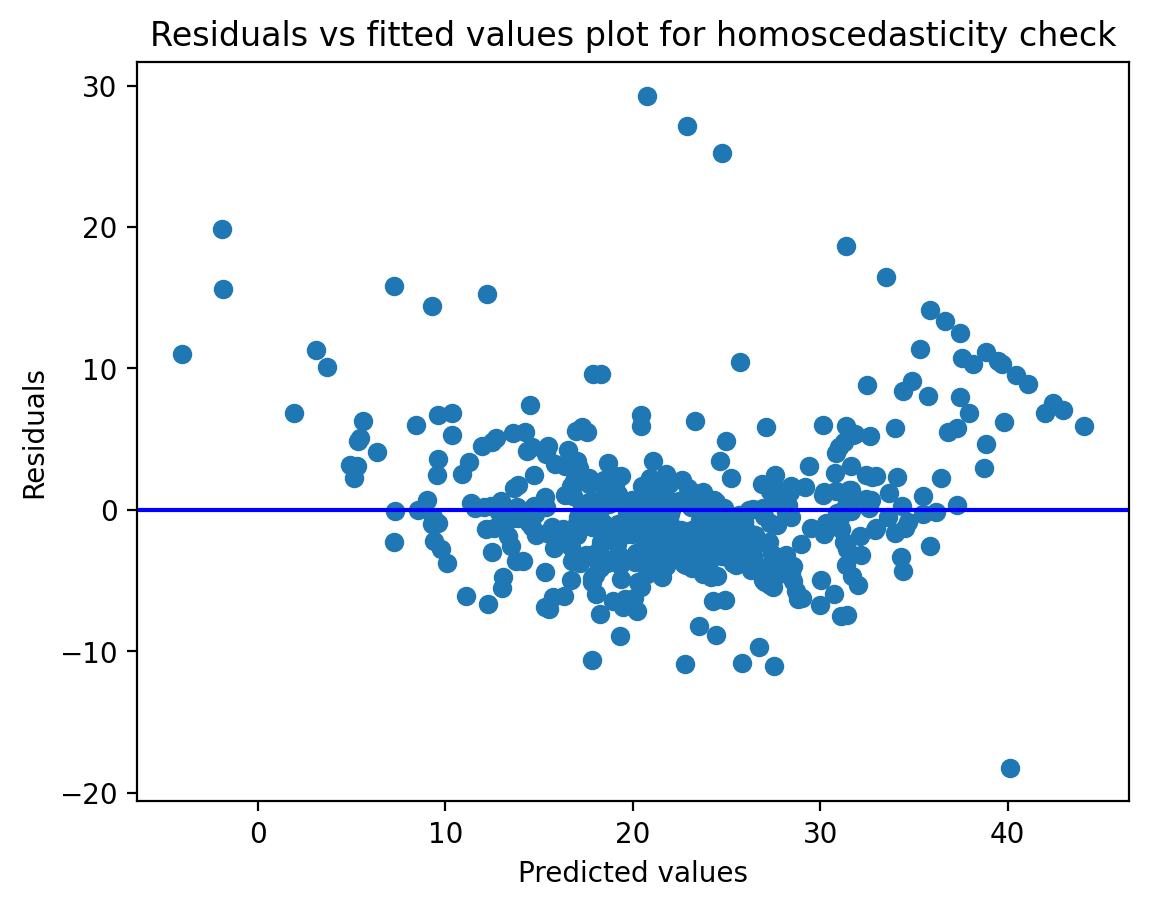

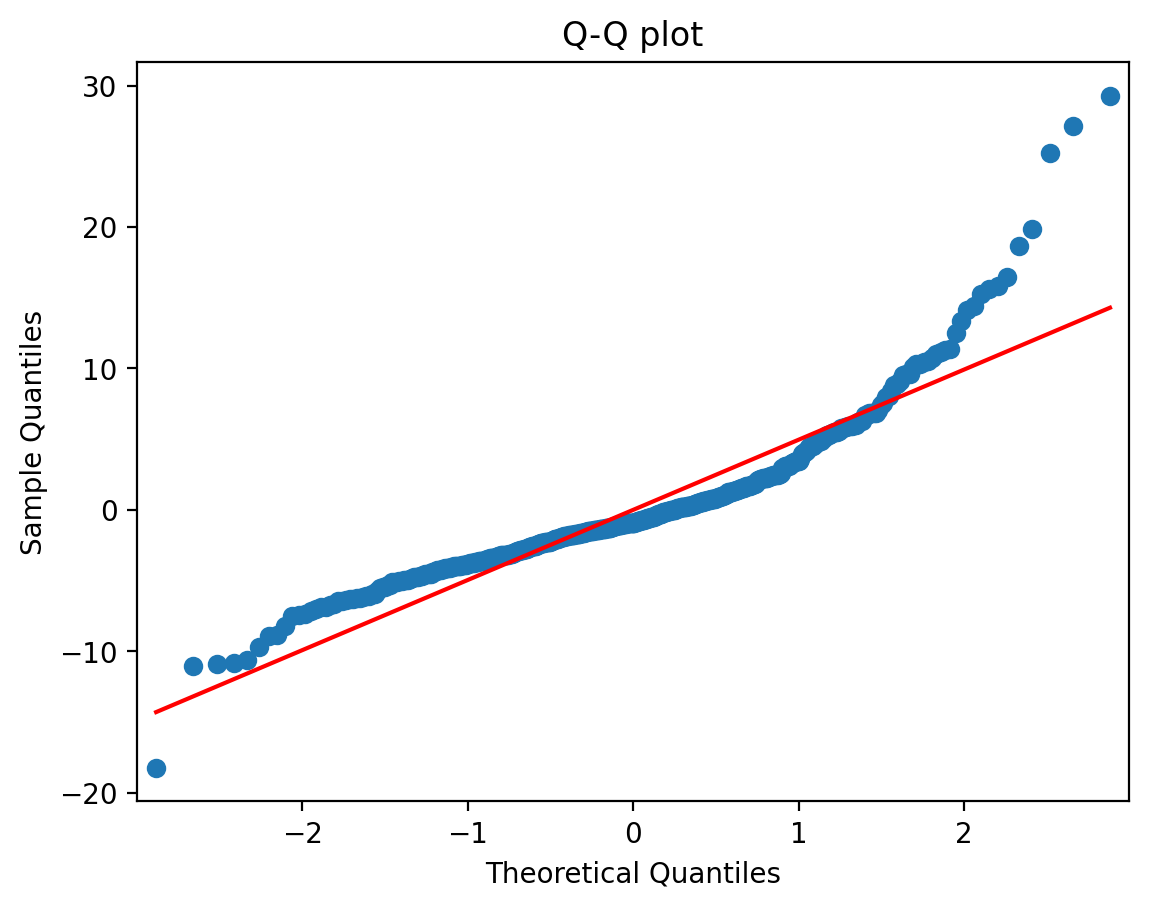

In [16]:
### c) ###

# We will standardise the predictors to avoid that the attribute with the highest magnitude in variability
# dominates the first principal components.

scaler = StandardScaler();
fitted = scaler.fit(Xc);
x      = fitted.transform(Xc); 

# PCA
pca = PCA(n_components=Xc.shape[1]);
principalComponents = pca.fit_transform(x);
print(pca.explained_variance_ratio_); # % variability explained by the component
print("Var explained by PCs: ", np.cumsum(pca.explained_variance_ratio_));
PCs = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
# print(pca.components_); # to see composition of PCs

DF = pd.concat([df, PCs], axis = 1);

#mod     = smf.ols("MEDV ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + C(CHAS)", data = DF);
mod     = smf.ols("MEDV ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC7 + PC9 + C(CHAS)", data = DF);

mod_res = mod.fit();
print(mod_res.summary());

# The first 9 principal components (out of 12) explain 96% of the variability.
# A linear model was fitted, obtaining an Adj. R-squared of 0.70.
# Some of the PCs were not significant according to the p-values, and were removed (PC6 and PC8).
# The new model has the same Adj R-squared

# Predicted values vs Residuals 
ypred     = mod_res.predict(DF)
residuals = np.stack(DF["MEDV"]) - np.stack(ypred) # from list to an array
p = plt.scatter(ypred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y = 0.0, color = 'b', linestyle = '-')
p = plt.title("Residuals vs fitted values plot for homoscedasticity check")	
plt.show()

# QQ plot
sm.qqplot(residuals, line='s');
plt.title('Q-Q plot')
plt.show()

# Because the PCs are orthogonal, the problem of multicollinearity disappears completely, and no matter 
# how many PCs are actually used, the regression equation will always contain all of the variables in X.
# Note that each PC is a linear combination of the predictors in X.
# However, the interpretability of the parameters can be very difficult or impossible.  
    
# PC used in the regression model can improve the numerical accuracy of the regression estimates because 
# of the use of orthogonal PCs. 

# The problem of multicollinearity is solved, keeping a similar R-squared value.


## Question 3 

### Question 3 (a)

In [17]:
X = df.iloc[:, :-1];
y = df[['MEDV']];

# Here we define training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0);

data_train = pd.concat([X_train, y_train], axis = 1)
mod     = smf.ols("MEDV ~ CRIM + ZN + INDUS + C(CHAS) + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = data_train)
mod_res = mod.fit();

# Removing INDUS, since it is not significant.
mod     = smf.ols("MEDV ~ CRIM + ZN + C(CHAS) + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = data_train)

# Removing AGE, it is not significant.
mod     = smf.ols("MEDV ~ CRIM + ZN + C(CHAS) + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT", data = data_train)
mod_res = mod.fit();
print(mod_res.summary())

# The AIC value favours the last model


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     100.8
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          3.40e-100
Time:                        23:08:57   Log-Likelihood:                -1032.4
No. Observations:                 354   AIC:                             2089.
Df Residuals:                     342   BIC:                             2135.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       38.1890      5.824      6.557   

### Question 3 (b)

In [ ]:
# Interpretation of the coefficient associated to CRIM: -0.1208 

# It is expected that the MEDV decreases 0.12 units for one unit increase in the per capita crime rate by town, 
# keeping the rest of predictors fixed.

# The R-square is 0.76.  This means that the model explains 76% of the variability of MEDV.

### Question 3 (c)

In [ ]:
# This model is better than the one tested in 2.c for predictions in terms of the R squared.
# However, the interpretation of the parameters is not reliable due to the multicollinearity.

### Question 3 (d)

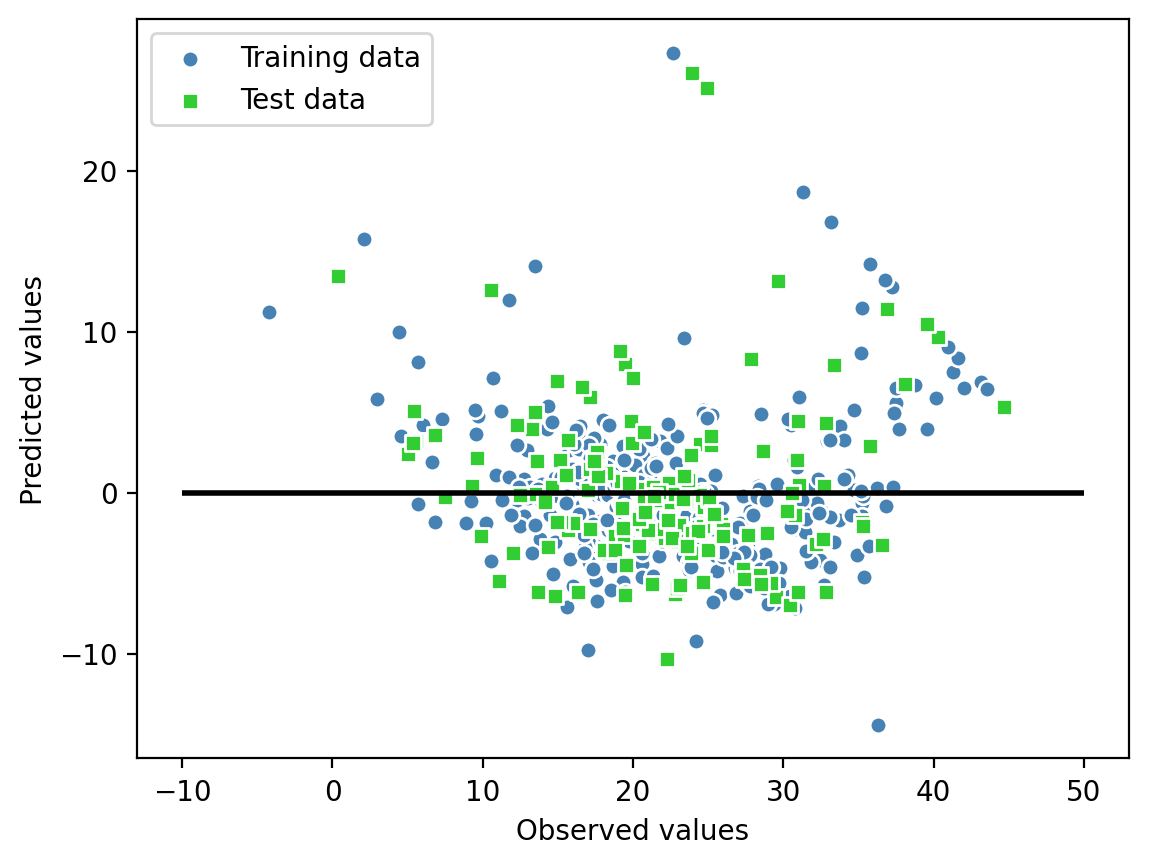

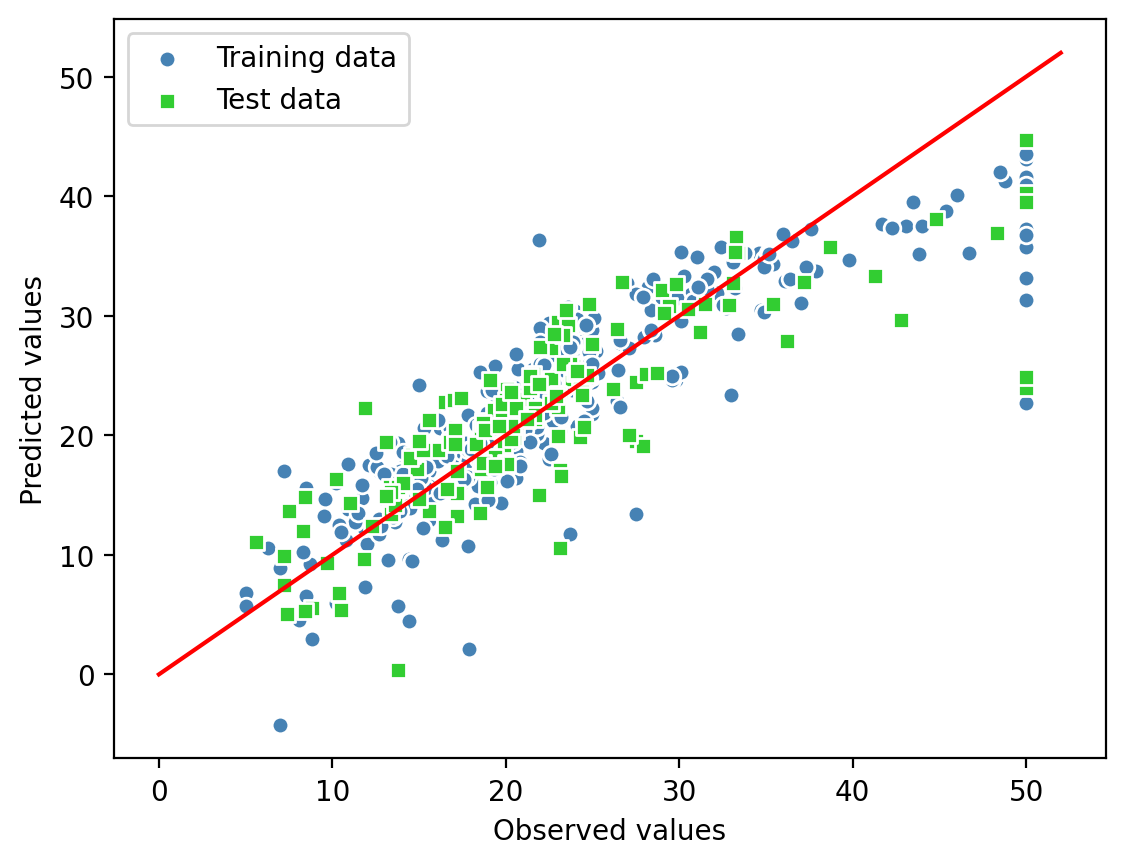

In [18]:
# Since our model uses multiple explanatory variables, we can't visualize the linear
# regression line (or hyperplane to be precise) in a two-dimensional plot, but we can plot
# the residuals (the differences or vertical distances between the actual and predicted
# values) versus the predicted values to diagnose our regression model.

y_test_pred = mod_res.predict(X_test);
y_test_pred = np.array(y_test_pred).flatten();
y_train_pred = mod_res.predict(X_train);
y_train_pred = np.array(y_train_pred).flatten();

y_test    = np.array(y_test).flatten();
y_train   = np.array(y_train).flatten();

plt.scatter(y_train_pred, y_train - y_train_pred, c='steelblue', marker='o',
            edgecolor='white', label='Training data');
plt.scatter(y_test_pred, y_test - y_test_pred, c='limegreen', marker='s',
            edgecolor='white', label='Test data');
plt.xlabel('Observed values');
plt.ylabel('Predicted values');
plt.legend(loc='upper left');
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2);
plt.show();

# The residuals for the test data seem to fluctuate randomly around 0, following a similar pattern of those from
# the training data set.

# The model behaves as expected in the test data set.  This is a good indicator of prediction power of the model.

# Observed values vs predictions
plt.scatter(y_train, y_train_pred, c='steelblue', marker='o',
            edgecolor='white', label='Training data');
plt.scatter(y_test, y_test_pred, c='limegreen', marker='s',
            edgecolor='white', label='Test data');
plt.xlabel('Observed values');
plt.ylabel('Predicted values');
plt.legend(loc='upper left');
x1 = np.linspace(0,52,100);
y1 = x1;
plt.plot(x1, y1, '-r', label='y=2x+1')
plt.show();

# The model seems to predict well for MEDV values lower than 40.  Higher values are underestimated.


### Question 2 (e)

In [19]:
### e) ###
# Using MSE (Mean Square Error to measure the performance -- accuracy metrics)

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred)));

print("Percentage change in MSE: ", 
      100*(mean_squared_error(y_test, y_test_pred) - mean_squared_error(y_train, y_train_pred)) /mean_squared_error(y_train, y_train_pred) )

# The MSE for the testing data set is 35% higher than that one for the training data set.
# This means that the accuracy does not increase, but it does not decrease that much.

# According to the plot of predicted values and residuals, the model is good in terms of predictions
# for observed MEDV values lower than 40.  For higher values, the model yields understimations.


MSE train: 19.984, test: 27.047
Percentage change in MSE:  35.3410720275863


## Appendix

In [20]:
# We could have also used the following functions to fit the linear models in question 3
slr = LinearRegression();
slr.fit(X_train, y_train);

# b)
print(slr.intercept_, slr.coef_, slr.score(X_train, y_train)); # Intercept is included
#print(df.head()); # to see order of predictors

y_train_pred = slr.predict(X_train);
y_test_pred  = slr.predict(X_test);


37.940049310595825 [-5.11484661e-04 -1.21538883e-01  4.48670392e-02  1.14644228e-02
  2.51618046e+00 -1.61937953e+01  3.86549149e+00 -1.03437385e-02
 -1.50136095e+00  2.46447569e-01 -1.09428742e-02 -1.01800246e+00
  6.81703964e-03 -4.86834328e-01] 0.7645756613636819


In [ ]:
# Useful resources:
'''
Read Linear Regression Assumptions 
https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0
https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
'''